# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [6]:
DATA_FOLDER = '' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.

In [ ]:
# Write your answer here

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [ ]:
# Write your answer here

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [62]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [63]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn', Mutes warnings when copying a slice from a DataFrame.

In [64]:
passengers = pd.read_excel(DATA_FOLDER+'/titanic.xls')

1) Describe the type and the value range of each attribute. Indicate and transform the attributes that can be Categorical. 

pclass, sex, embarked, survived is stored as a integer but can categorized

In [65]:
passengers['pclass'] = passengers.pclass.astype('category')
passengers['sex'] = passengers.sex.astype('category')
passengers['embarked'] = passengers.embarked.astype('category')
passengers['survived'] = passengers.survived.astype('category')

Types and values:
- pclass: categorical, values 1, 2, 3
- survived: categorical, values 0 or 1
- name: object (strings)
- sex: categorical, takes values female or male
- age: float, values in the range 0.16 - 80.0
- sibsp: integer, values in the range 0 - 5
- parch: integer, values in the range 0 - 6
- ticket: objects
- fare: float, values in the range 0.0 - 512.32
- cabin: object
- embarked: categorical, takes values in "S", "C", "Q"
- boat: object
- body: float (because of the Nan values), values in range 1.0 - 328.0
- home.dest: object (strings)

2) Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals. 

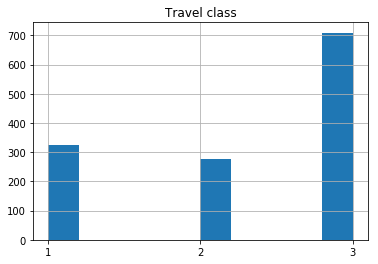

In [66]:
ax1 = passengers.pclass.hist()
ax1.set_title('Travel class')
ax1.set_xticks([1, 2, 3])
ax1.set_xticklabels([1, 2, 3])

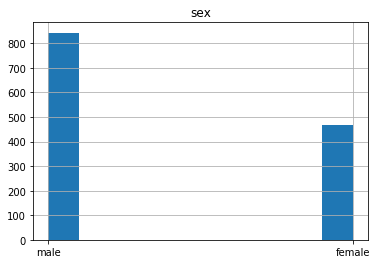

In [67]:
ax2 = passengers.sex.map(lambda x: 0 if x == 'male' else 1).hist()
ax2.set_title('sex')
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['male', 'female'])

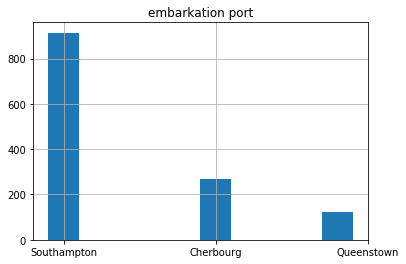

In [69]:
bar_width = 0.2
ax3 = passengers.embarked.map(lambda x: {'S': 0, 'C': 1, 'Q': 2}[x]).hist(width=bar_width)
ax3.set_title('embarkation port')
ax3.set_xticks(np.array([0, 1, 2])+bar_width/2)
ax3.set_xticklabels(['Southampton', 'Cherbourg', 'Queenstown'])

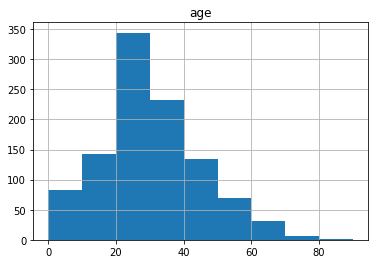

In [70]:
ax4 = passengers.age.hist(bins=[10*i for i in range(10)])
ax4.set_title("age")

3) Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

In [71]:
def map_cabin_str_to_floor(x):
    try:
        return x[0]
    except:
        return 'undefined'

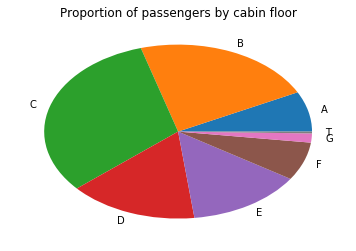

In [74]:
passengers_grouped = passengers.groupby(passengers.cabin.map(map_cabin_str_to_floor))
number_of_passengers_per_floor = passengers_grouped.size()
(fig, ax) = plt.subplots()
plt.pie(number_of_passengers_per_floor.drop('undefined').sort_index(),
        labels=number_of_passengers_per_floor.index.drop('undefined').sort_values())
ax.set_title('Proportion of passengers by cabin floor')

4) For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

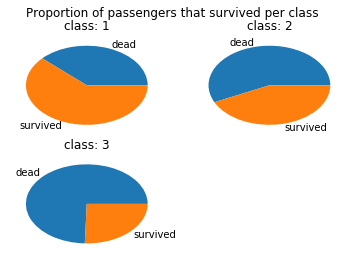

In [77]:
passengers_per_class = passengers.groupby(passengers.pclass)
number_of_classes = len(passengers_per_class.size())
i = 1
(fig, main_ax) = plt.subplots()
for pclass, group in passengers_per_class:
    ax = plt.subplot((number_of_classes//2)+1, 2, i)
    i += 1
    plt.pie(group.survived.value_counts().sort_index(), labels=['dead', 'survived'])
    ax.set_title("class: " + str(pclass))
fig.suptitle('Proportion of passengers that survived per class')

5) Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [78]:
def get_survival_proportions_from_group(input_groups):
    proportions = []
    for cs, group in input_groups:
        t = group.survived.value_counts().sort_index()
        t = t/np.sum(t)
        proportions.append((cs, t))
    return proportions

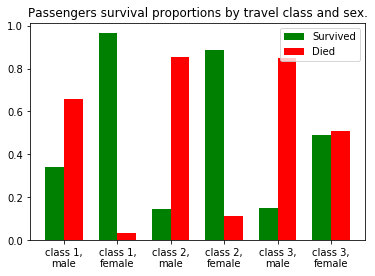

In [79]:
passengers_per_class_and_sex_groups = passengers.groupby(['pclass', 'sex'])
proportions = get_survival_proportions_from_group(passengers_per_class_and_sex_groups)
proportions.sort(key=lambda x: 2*x[0][0] + {'male':0, 'female':1}[x[0][1]])
ind = np.arange(len(proportions))
width_bar = 0.35
survived = [x[1][1] for x in proportions]
died = [x[1][0] for x in proportions]
labels = ["class " + str(x[0][0]) + ",\n" + x[0][1] for x in proportions]
fig, ax = plt.subplots()
rects1 = ax.bar(ind, survived, width_bar, color='g')
rects2 = ax.bar(ind+width_bar, died, width_bar, color = 'r')
ax.legend((rects1[0], rects2[0]), ('Survived', 'Died'))
ax.set_title('Passengers survival proportions by travel class and sex.')
ax.set_xticks(ind + width_bar / 2)
ax.set_xticklabels(labels)

6) Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index.

In [80]:
median = np.median(passengers.age.dropna())
group1 = passengers.query('age <= ' + str(median))
group2 = passengers.query('age > ' + str(median))
proportions_group1 = get_survival_proportions_from_group(group1.groupby(['pclass', 'sex']))
proportions_group2 = get_survival_proportions_from_group(group2.groupby(['pclass', 'sex']))
proportions_group1.sort(key=lambda x: 2*x[0][0] + {'male':0, 'female':1}[x[0][1]])
proportions_group2.sort(key=lambda x: 2*x[0][0] + {'male':0, 'female':1}[x[0][1]])
age_categories = ('<= ' + str(median), '> ' + str(median))
group1_dataframe = pd.DataFrame([
    {
        'age':age_categories[0],
        'pclass': x[0][0],
        'sex': x[0][1],
        'survived': x[1][1],
        'dead': x[1][0]
    }
    for x in proportions_group1
])
group2_dataframe = pd.DataFrame([
    {
        'age':age_categories[1],
        'pclass': x[0][0],
        'sex': x[0][1],
        'survived': x[1][1],
        'dead': x[1][0]
    }
    for x in proportions_group2
])
final_dataframe = group1_dataframe.set_index(['age', 'pclass', 'sex'])
final_dataframe = final_dataframe.combine_first(group2_dataframe.set_index(['age', 'pclass', 'sex']))
print(final_dataframe)

                           dead  survived
age     pclass sex                       
<= 28.0 1      female  0.048780  0.951220
               male    0.468750  0.531250
        2      female  0.089286  0.910714
               male    0.783784  0.216216
        3      female  0.486239  0.513761
               male    0.816964  0.183036
> 28.0  1      female  0.032609  0.967391
               male    0.697479  0.302521
        2      female  0.127660  0.872340
               male    0.916667  0.083333
        3      female  0.627907  0.372093
               male    0.856000  0.144000
